# <span style="color:green"><center>Diplomado en Inteligencia Artificial y Aprendizaje Profundo</center></span>

# <span style="color:red"><center>Red Neuronal desde Cero</center></span>

##   <span style="color:blue">Profesores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 
3. Campo Elías Pardo Turriago, cepardot@unal.edu.co 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

## <span style="color:blue">Asistentes</span>

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Contenido</span> 

* [Introducción](#Introducción)
* [Descargando Datos de Ejemplo](#Descargando-Datos-de-Ejemplo)
* [Leyendo Datos con Pickle](#Leyendo-Datos-con-Pickle)
* [Visualizando los Datos](#Visualizando-los-Datos)
* [Transformar Datos a Forma Tensorial](#Transformar-Datos-a-Forma-Tensorial)
* [Objetivo de la Red Neuronal](#Objetivo-de-la-Red-Neuronal)
* [Red Neuronal Artificial From Scratch!](#Red-Neuronal-Artificial-From-Scratch!)
    * [Racional](#Racional)
    * [Diferenciación Automática](#Diferenciación-Automática)
* [Enfoque Matemático de una RNP](#Enfoque-Matemático-de-una-RNP)
    * [Modelamiento matemático de una RNP con una capa oculta](#Modelamiento-matemático-de-una-RNP-con-una-capa-oculta)



## <span style="color:blue">Introducción</span>

Para esta lección y en el resto del diplomado se requiere tenr instalado Tensorflow. Por favor crre una nuevo ambiente en con Conda es instale una versión fresca de Tensorflow.

Desde la versión 2.0 Tensorflow incluye por defecto la API Keras para crear las redes neuronales de manera bastante simple y natural.

 
Siga las siguientes instrucciones en la terminal o haga las instalación desde la interface gráfica de Anaconda. En el ejemplo llamaremos tf al  nuevo ambiente. Conda le instala lo necesario, incluido la versión de Python mas reciente que maneja Tensorflow. 

Si bien la API de tensorflow Keras es bastante útil para resumir una cantidad considerable de líneas de código cuando se construye una red neuronal y se logra flexibilidad en la forma de diseño de la red, es muy importante primero entender cómo construir una red desde cero, en caso que sea necesario volver a cambiar detalles que no son claros o modificables desde la API.

Además de esto, ganamos entendimiento profundo sobre cómo es que realmente funciona una red por dentro.

Ese es el propósito de éste cuaderno.

Construiremos una red neuronal desde cero usando nada más que tensorflow, para luego refactorizar el código hasta llegar a la abstracción visible cuando usamos Keras en una próxima lección.

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Descargando datos de ejemplo </span> 

En ésta ocasión haremos un ejercicio de clasificación.

Para este fin, usaremos el conjunto de datos de juguete más utilizado para probar modelos de redes neuronales, llamado **MNIST**.

**MNIST = Modified National Institute of Standards and Technology database**

Esta es una base de datos de dígitos entre cero y nueve digitalizados en escala de grises. 

Esto siginifica que cada punto de la imagen digitalizada es representada  mediante un byte. Es decir, es posible representar 256 tonos de grises, con valores enteros entre 0 (negro) hasta 255 (blanco). 

Además, la base de datos contiene una etiqueta (label) para cada  imagen.

### Opcional request

Usar request para bajar los datos desde la fuente.

Use el siguiente código si desea familiarizarse con request.

In [ ]:

# Importar librería necesaria para crear archivos localmente
from pathlib import Path
# Importar libreria necesaria para descargar archivos de la web
import requests

# Generar Camino Para archivo
carpeta_datos= Path("../Datos")

# Especificar el nombre del dataset
camino = carpeta_datos / "MNIST"

# Crear directorio en el lugar indicado
camino.mkdir(parents=True, exist_ok=True)

# Posición actual en el equipo
donde_estoy=!pwd
#Note que la variable se guarda como una lista, no como un string
print("\nActualmente estoy en:\n\n",donde_estoy[0],"\n")

# Colocar la URL donde se encuentran los datos
url = "http://deeplearning.net/data/mnist/"
# Separar el nombre del archivo (Note que ha sido comprimido)
nombre_archivo = "mnist.pkl.gz"

# Comprobar si existe el archivo a descargar
if not (camino / nombre_archivo).exists():
    
        #Mensaje para el usuario
        print("\nBajando Archivo Desde la URL "+url+nombre_archivo+"\n")
        
        # Haciendo un request a la url correspondiente y obtener contenido
        contenido = requests.get(url + nombre_archivo).content
        
        # Escribir el contenido binario del request
        (camino / nombre_archivo).open("wb").write(contenido)

        # Exito, mostrar camino donde se encuentra el archivo descargado
print("Bajado con éxito en:\n\n"+donde_estoy[0]+"/"+camino.as_posix())

**¿Confundido?**, ¡chequea un [Quickstart](https://es.python-requests.org/es/latest/user/quickstart.html) en la libreria request para comenzar!

[[Volver al Inicio]](#Contenido)

### Opcional  Leyendo Datos con Pickle

El archivo descargado se encuentra en contenido binario.

Una librería eficiente para leer archivos binarios, se llama **pickle**.

Además, como el archivo esta comprimido (extensión .gzip) necesitaremos la librería **gzip**.

In [2]:
import pickle
import gzip

# Operador lógico with para abrir el archivo descargado y leer bytes (readbytes)
with gzip.open((camino / nombre_archivo).as_posix(), "rb") as f:
        
        # desempaqueta la información en diferentes variables (entrenamiento+validación)
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

Quizá, en este punto, sea buena idea leer aquí: [What do the gzip.open() modes mean?](https://www.reddit.com/r/learnpython/comments/88h4yz/what_do_the_gzipopen_modes_mean/)

[[Volver al Inicio]](#Contenido)

### Lectura de datos desde Keras

Para empezar rápidamente recomendamos bajr los datos desde la API Keras, ya instalada con Tensorflow.

### Librerías requeridas

In [1]:
import tensorflow as tf
print("Versión de Tensorflow: ",tf.__version__,"\n")

import matplotlib.pyplot as plt

Versión de Tensorflow:  2.4.1 



In [100]:
 ((x_train, y_train), (x_valid, y_valid)) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

In [101]:
y_train.shape

(60000,)

### Aplana los datos

Si lee los datoa directamente desde la URL, probablemente ya están aplanados

In [103]:
x_train = x_train.reshape((-1,784))
x_valid = x_valid.reshape((-1,784))
print('x_train.shape=',x_train.shape)
print('x_valid.shape=',x_valid.shape)

x_train.shape= (60000, 784)
x_valid.shape= (10000, 784)


## Visualizando los Datos

**Una vez leídos los datos**, podemos por ejemplo, mirar qué forma tienen los datos:

In [104]:
print("Forma de los Datos de entrenamiento:",x_train.shape)
print("Forma de los Datos de validación   :",x_valid.shape)

Forma de los Datos de entrenamiento: (60000, 784)
Forma de los Datos de validación   : (10000, 784)


Cada imagen del dataset clásico tiene un tamaño de 28 x 28 pixeles, con lo cual cada una es representada por 784 números entre cero y 255. 

Vamos a **visualizar** los datos con **matplotlib**, 


Imagen de ejemplo:



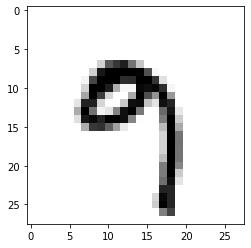

Etiqueta (label) Asignada por Humano: 9


In [81]:
import matplotlib.pyplot as plt
import numpy as np

print("\nImagen de ejemplo:\n")

# Elegir una observación al azar usando randint
azar=np.random.randint(x_train.shape[0])

#Visualizar la imagen usando imshow en escala de grises
plt.imshow(x_train[azar].reshape((28,28)), cmap="binary")
#plt.axis("off")
plt.show()
print("Etiqueta (label) Asignada por Humano:",y_train[azar])

**Ahora, un regalito útil para el futuro (para ver varios ejemplos al mismo tiempo)**

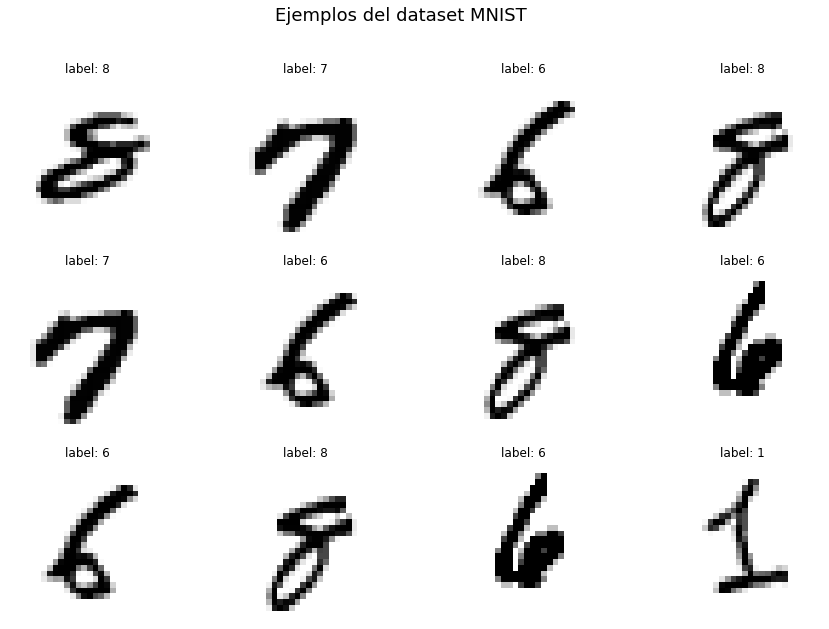


Indices Elegidos:  [18130 53097 23195 48655 40085  4958 25519 40485 22172 56032 52463 44372] 


Elementos Elegidos:  [8 7 6 8 6 1 2 9 3 5 7 0] 



In [18]:
#Cuántas filas
filas=3
#Cuantas columnas
colus=4
#Elementos totales
n=filas*colus
#Elegir una muestra del dataset via índices
vector_azar=np.random.randint(x_train.shape[0],size=(n,))
# contador para dibujar en la grilla
w=1
#iniciar espacio de dibujo
plt.figure(figsize=(15,10))
#titulo
plt.suptitle("Ejemplos del dataset MNIST",fontsize=18)

# Loop anidado para recorrer la matriz completa
for i in range(filas):
    for j in range(colus):
        
        # subplots se peden contar incrementalmente
        plt.subplot(filas,colus,w)
        # dibujar el ejemplo de la muestra convertida a una matrix 28X28
        plt.imshow(x_train[vector_azar[i+j]].reshape((28, 28)), cmap="binary")
        #mostrar la etiqueta dada por el humano a dicho ejemplo (Aprendizaje supervisado)
        plt.title("label: "+str(y_train[vector_azar[i+j]]))
        #No mostrar ejes corrdenados
        plt.axis("off")
        # Incrementar contador
        w+=1

plt.show()
#mostrar índices de los ejemplos elegidos
print("\nIndices Elegidos: ",vector_azar,"\n")
# mostrar etiquetas correspondientes
print("\nElementos Elegidos: ",y_train[vector_azar],"\n")

Observemos algunos datos en bruto:

In [82]:
#Extraer pixeles 10->15 en x y 10->15 en y
x_train[azar].reshape((28,28))[10:15,10:15]

array([[226,  80,   8,   8, 247],
       [ 42,   0,   0,  84, 253],
       [  0,   0,  55, 240, 244],
       [ 27, 124, 238, 255, 135],
       [254, 254, 241, 122,   2]], dtype=uint8)

Como podemos observar, estos ejemplo ya han sido tratados, pues se muestran número entre cero y uno.

Usamos la forma alternativa de subir los datos, haciendo uso de los **datasets** internos que vienen por defecto en la instalación de **tensorflow.keras**:

```(x_train, y_train), (x_valid, y_valid) = tf.keras.datasets.mnist.load_data()```


[[Volver al Inicio]](#Contenido)

## Transformar Datos a Forma Tensorial

En Tensorflow puro se trabaja con tensores mas que con arreglos de numpy, así que deberemos transformar nuestros datos.

Para este fin, usaremos la función ```tf.constant```

In [105]:
# Chequear la versión de tensorflow disponible
print("Versión de Tensorflow: ",tf.__version__,"\n")


# transforma los features a la escala [0,1]
x_train, x_valid = np.array(x_train/255.0,dtype=np.float32), np.array(x_valid/255.0,dtype=np.float32)
y_train, y_valid = np.array(y_train,dtype=np.int32), np.array(y_valid,dtype=np.int32)

Versión de Tensorflow:  2.4.1 



In [106]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=int32)

In [107]:
# Usando función map para convertir TODOS los datos a tensor
x_train, y_train, x_valid, y_valid = map(tf.constant, 
                                    (x_train, y_train, x_valid, y_valid))
#Mostrar datos
print("Datos de Entrenamiento:\n")
print(x_train,"\n")
print("Etiquetas de Entrenamiento:\n")
print(y_train.numpy(),"\n")

#Chequear límites de las etiquetas
print(f'Label mínimo: {tf.reduce_min(y_train).numpy()}')
print(f'Label máximo: {tf.reduce_max(y_train).numpy()}')
print("Label únicos:",np.sort(tf.unique(y_train)[0].numpy()))

Datos de Entrenamiento:

tf.Tensor(
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 784), dtype=float32) 

Etiquetas de Entrenamiento:

[5 0 4 ... 5 6 8] 

Label mínimo: 0
Label máximo: 9
Label únicos: [0 1 2 3 4 5 6 7 8 9]


In [108]:
x_train

<tf.Tensor: shape=(60000, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Objetivo de la Red Neuronal</span> 

###  Modelo Logístico Multinomial

El propósito de la red es clasificar cada una de las imágenes en una de 10 clases. Cada clase representa a un dígito entre 0 y 9.

En este experimento cada imagen será presentada a la entrada de la red como una tensor de una dimensión (1D) y de tamaño (shape) $28\times 28 = 784$. Por lo tanto, la capa entrada se tendran 784 neuronas. La red no tendrá capas ocultas. La capa de salida tendrá 10 neuronas, debido a que hay 10 clases.

El tipo de red será densa o completamente conectada, es  decir cada neurona de entrada está conectada con cada neurona de salida. 

Así, la matriz de pesos $\mathbf{W}$ tendrá tamaño $784 \times 10$ y el vector $\mathbf{b}$ de interceptos (bias) será de un vector tamaño 10.


En nuestro primer modelo, la función de activación de la capa de entrada será la identidad y en la capa de salida la función de activación será la función *softmax* que definimos abajo.

La siguiente imagen ilustra el diseño (topología) de la primera red que constriomos desde cero. Esta red, es realmente un modelo logístico multinomial clásico.

![Multinomial](../Imagenes/am_ANN_mnist_748_10.jpg)

[[Volver al Inicio]](#Contenido)

## <span style="color:blue">Red Neuronal Artificial desde cero!</span> 

Vamos a crear un modelo simple, para lo cual solamente usaremos las operaciones de Tensorflow.

Los pesos son inicializados siguiendo la propuesta de <a href='http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf'>Glorot_Bengio </a>. Se generaran números aleatorios uniformemente distribuidos entre -1 y 1 divididos por $\sqrt{n}$. 

In [109]:
import math


n=x_train.shape[1]
output=10

weights = tf.Variable(tf.random.uniform((n,output))/math.sqrt(n), dtype= tf.float32)
bias = tf.Variable(tf.zeros(output),tf.float32)

In [110]:
print(weights.numpy().shape)
print(bias.numpy().shape)

(784, 10)
(10,)


Usamos  *tf.Variable* para declarar tensores de tipo variable, es decir, cuyo contenido cambia a los largo de nuestro algortimo.

### Racional

Por  otro lado, observe que *weights* es una matriz de tamaño $784 \times 10$ y *bias* es un vector de tamaño 10. Vamos a construir una red neuronal que tiene solamente dos capas: entrada con 784 neuronas y salida con 10 neuronas. Note que nuestros patrones de entrada son vectores de tamaño 784.

La razón de tener 10 neuronas de salida es porque tenemos un problema de clasificación en 10 clases. Podemos imaginar intuitivamente que construimos un modelo de regresión logística para cada una de las clases. 

Entonces a la salida esperamos tener es la probabilidad de que el patron de entrada pertenezca a esa clase.

### Diferenciación Automática

Desde Tensorflow 2.X se incluye **diferenciación automática** para calcular gradientes automáticamente. Esto permite usar funciones estándar de Python como modelos para la redes. 

### Función de Activación softmax

Vamos a crear un modelo lineal simple. Necesitaremos una función de activación, por lo que vamos a escribir la función *log_softmax*. La variable $\eta$ en la función, que corresponde al máximo de los valores, se introduce para tener una función muy robusta, desde el punto de vista computacional.

Para un conjunto de valores $x_1,\ldots,x_n$, la función softwax transforma estos valores en la escala (0,1), que pueden interpretarse como probabilidades. Cada componente de softmax es interpretada como la probabilidad que la imagen pertenezca a la clase representada por dicha componente.

Matemáticamente se escribe

$$
\begin{equation}
Prob[y=j|x] = \frac{\exp(x_j)}{\sum_{k=1}^{n}\exp(x_j)}
\end{equation}
$$

Un cálculo muy estable computacionalmente de estos valores se obtiene de la siguente manera. Sea $\eta = \underset{i}{\text{max}} \hspace{2mm} \{x_i\}$. Es fácil verificar que

$$
\begin{equation}
Prob[y=j|x] = \frac{\exp(x_j-\eta)}{\sum_{k=1}^{n}\exp(x_k-\eta)} = \text{softmax}_j(x)
\end{equation}
$$

Observe que $\log \text{softmax}_j(x)  = x_j - \eta - \log(\sum_{k=1}^n \exp(x_k-\eta))$.

In [111]:
import numpy as np
def log_softmax(x):
    η = tf.math.reduce_max(x)
    return x - η - tf.math.log(tf.math.reduce_sum(tf.math.exp(x-η), -1, keepdims=True))

def model(xb):
    return log_softmax(xb@weights + bias) # z = x'W +b
    #return log_softmax(tf.linalg.matmul(xb,weights) + bias)

En la celda anterior, el símbolo @ representa la operación del producto punto (en este caso corresponde a el producto de un vector con una matriz).

Llamaremos a nuestra función con un lote de datos (en este caso, 64 imágenes). Este es un paso hacia adelante (forward pass). Tenga en cuenta que nuestras predicciones no serán mejores que aleatorias en esta etapa, ya que comenzamos con pesos aleatorios.

## Paso Hacia Adelante (Forward Pass) 

In [112]:
bs = 64# batch size

xb = x_train[0:bs]
preds = model(xb) # predictions
print('Predicciones para la primera imagen:\n\n',preds[0],"\n")
print('Tamaño de la matriz de predicciones de este lote: ', preds.shape)

Predicciones para la primera imagen:

 tf.Tensor(
[-2.3090463 -2.2887955 -2.2076452 -2.2677054 -2.3034987 -2.2903447
 -2.3672752 -2.3688927 -2.2506318 -2.386469 ], shape=(10,), dtype=float32) 

Tamaño de la matriz de predicciones de este lote:  (64, 10)


### Función de pérdida

Vamos a implementar la función menos log-verosimilitud, la cual usaremos como **función de pérdida** (loss function). Esta es la misma **entropía cruzada**(cross entropy, usando la codificación One-hot).


Matemáticamente, la función de pérdida en esta caso es definida como sigue:



###  El Modelo

Aqui $\mathbf{x}_i$ denota la observación $i$. 

$$
\pi_{ik} = Prob[\mathbf{x} \in \mathcal{C}_k] = sofmax_k(\mathbf{x}_i) = \frac{\exp(\mathbf{x}_i'\mathbf{w}_k + \mathbf{b}_k)}{\sum_{s=1}^K  \exp (\mathbf{x}_i'\mathbf{w}_s+  \mathbf{b}_s)} 
$$


###  Función de pérdida 

En esta sección $\mathbf{W}$ es la martriz completa de pesos. Cada fila $\mathbf{w}_k$ está asociada a la respectiva categoría $\mathcal{C}_k$.

Entropía cruzada: **-log verosimilitud** .  Aqui $\mathbf{x}_i$ denota la observación $i$ y $y_i$ la respectiva etiqueta. Sea $\chi_{ik}$ definda por

$$
\chi_{ik} = \begin{cases} 1, & \text{ si } y_i = k\\
0, & \text{ en otro caso. }\end{cases}
$$


$$
loss(\mathbf{W},\mathbf{b}) = -\frac{1}{N}  \sum_i \sum_k \chi_{ik} \log \pi_{ik}
$$

### Predicción

$$
\tilde{y} = \text{índice}(\max_{k}{\pi_k(x)})
$$

###  Precisión

$$
\begin{equation*}
\text{accuracy} = \frac{1}{N} \sum_{i=1}^{N} 1_{y_i =\tilde{y}_i}
\end{equation*}
$$

In [113]:
def nll(input, target):
    indices = tf.stack([tf.range(input.shape[0]),target], axis=1)
    return tf.math.reduce_mean(-tf.gather_nd(input, indices))

loss_func = nll

Sobre el código anterior. 
1. *tf.range(input.shape[0])*  genera un tensor con números en el rango entre 0 y 63, porque la forma (shape) es 64, el tamaño del batch.
2. *tf.stack([tf.range(input.shape[0], dtype=tf.int32),target], axis=1)* crea un tensor bidimensional, en donde cada fila corresponde al índice del elemento que debe tomarse de cada fila de input para calcular la funcion de pérdida. Por ejemplo, si la fila 3 de índice es [3,4], significará que y_train[3] es 4, y ṕor tanto se requiere tomar el contenido de la cuarta posición de la entrada 3.
3. tf.gather_nd(input, indices). Para cada fila de input toma el valor de input en la posición indicada en el índice, como se explica en el numeral 2.
4. tf.math.reduce_mean(-tf.gather_nd(input, indices)), calcula el resumen. La media, que corresponde exáctamete a - log likelihood

Veámos una ilustración de índices. 

In [93]:
# ejemplo del tensor indices
import pandas as pd
pattern = {'0': 0, '1': 1, '2':2, '3':3, '4':4}
target = {'0': 3, '1': 0, '2':5, '3':7, '4':1}
indices = pd.DataFrame({'pattern': pattern, 'target':target})
indices

,pattern,target
0,0,3
1,1,0
2,2,5
3,3,7
4,4,1


la columna pattern en esta ilustración contiene el índice del respectivo patrón de entrada. La columna target es el target asociado al respectivo patrón de entrada. Indices es esta matriz con las dos columnas.

La última línea del código calcula la función de pérdida definida arriba.

Revisamos ahora la **función de pérdida** para el modelo con datos aleatorios. Esto permitirá comparar las mejoras después del paso de propagacion hacia atrás  (backpropagation)

In [114]:
yb = y_train[0:bs]
print(loss_func(preds,yb))

tf.Tensor(2.2912655, shape=(), dtype=float32)


También implementamos la función precisión (accuracy) de nuestro modelo.

In [123]:
def accuracy(out, yb):
    preds = tf.math.argmax(out, axis=1,output_type=tf.int32)
    return tf.math.reduce_mean(tf.dtypes.cast(preds == yb, tf.float16))

chequamos la precisión actual del modelo

In [124]:
print(accuracy(preds,yb))

tf.Tensor(0.1094, shape=(), dtype=float16)


### Entrenamiento de la Red
 
 Estamos listos para correr el ciclo de entranamiento. Para calcular los gradientes usaremos diferenciación automática, con la clase tf.GradientTape.
 
- Seleccionamos un mini-batch de datos de tamaño *bs*
- Bajo un contexto tf.GradientTape 
 - Usamos el modelo para hacer predicciones
 - Calculamos la pérdida
- Calculamos el gradientes de las operaciones registradas en el contexto de esta cinta (tape).

Ahora usamos estos gradientes para actualizar los pesos (weights) y los desplazamientos (bias).


In [125]:
lr = 0.2 # learning rate
epochs = 2 # how many epochs to train for
n = x_train.shape[0]

for epoch in range(epochs):
    for i in range((n-1)//bs +1):
        start_i = i*bs
        end_i = start_i + bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        with tf.GradientTape() as t:
            pred = model(xb)
            loss = loss_func(pred,yb)
        dW, dB = t.gradient(loss,[weights,bias])
        weights.assign_sub(lr*dW)
        bias.assign_sub(lr*dB)


Hemos creado y entrenado una red neuronal minimal( en este caso una regression logística multinomial, dado que no tiene capas ocultas) totalmente desde cero (from scratch).

Revisemos la pérdida y precisión del modelo.

In [126]:
# pérdida y precisión datos de entrenamiento
print("train loss: ",loss_func(model(x_train),y_train))
print("train accuracy: ",accuracy(model(x_train),y_train))

# pérdida y precisión datos de validación
print("test loss: ",loss_func(model(x_valid),y_valid))
print("test accuracy: ",accuracy(model(x_valid),y_valid))

train loss:  tf.Tensor(0.30652905, shape=(), dtype=float32)
train accuracy:  tf.Tensor(0.911, shape=(), dtype=float16)
test loss:  tf.Tensor(0.30012172, shape=(), dtype=float32)
test accuracy:  tf.Tensor(0.9136, shape=(), dtype=float16)


## Recuperando estimaciones (Weights & Bias) 

In [127]:
weights

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[0.01936717, 0.01670487, 0.01259941, ..., 0.0354806 , 0.02773505,
        0.024815  ],
       [0.01509231, 0.0284929 , 0.00563908, ..., 0.01314457, 0.02220905,
        0.00493607],
       [0.0047584 , 0.02688436, 0.03469312, ..., 0.03535743, 0.02096629,
        0.0103931 ],
       ...,
       [0.00444492, 0.03566462, 0.02684227, ..., 0.03182695, 0.01084574,
        0.00429973],
       [0.01353151, 0.01630927, 0.01565207, ..., 0.0348251 , 0.0053246 ,
        0.00656663],
       [0.0292965 , 0.02399355, 0.03454986, ..., 0.01452523, 0.01184466,
        0.009656  ]], dtype=float32)>

In [128]:
bias

<tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([-0.3216015 ,  0.33821732,  0.06465681, -0.23871014,  0.05610637,
        1.0925262 , -0.07184623,  0.5204884 , -1.2441906 , -0.19565555],
      dtype=float32)>